In [61]:
import sys , ROOT
sys.path.insert(0, '/uboone/app/users/ecohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/mySoftwarePackage/mac')
import pylab
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from root_numpy import tree2array 
import seaborn as sns
from ROOT import TPlots
import Initiation as init
import my_tools
dirname = init.createnewdir()
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
DataName = "MC_BNB"
main_path = "/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna"
anafiles_path = main_path + "/TracksAnaFiles"

In [49]:
ana = TPlots( anafiles_path + "/Tracks_" + DataName + "_AnalysisTrees.root" , 'TracksTree' )
branches=['tracks.dEdx_Y','tracks.track_length_Y']
ana_p = tree2array(ana.GetTree(),selection='tracks.dEdx_Y>0.1 && MCpdgCode==2212'
                   , branches=branches)
ana_mu = tree2array(ana.GetTree(),selection='tracks.dEdx_Y>0.1 && (MCpdgCode==13 || MCpdgCode==-13)'
                    , branches=branches)
ana_pi = tree2array(ana.GetTree(),selection='tracks.dEdx_Y>0.1 && (MCpdgCode==211 || MCpdgCode==-211 || MCpdgCode==111)'
                    , branches=branches)
ana_em = tree2array(ana.GetTree(),selection='tracks.dEdx_Y>0.1 && (MCpdgCode==11 || MCpdgCode==-11 || MCpdgCode==22)'
                    , branches=branches)

In [53]:
length_p = np.concatenate(ana_p['tracks.track_length_Y']).ravel().tolist()
length_mu = np.concatenate(ana_mu['tracks.track_length_Y']).ravel().tolist()
length_pi = np.concatenate(ana_pi['tracks.track_length_Y']).ravel().tolist()
length_em = np.concatenate(ana_em['tracks.track_length_Y']).ravel().tolist()

dEdx_p = np.concatenate(ana_p['tracks.dEdx_Y']).ravel().tolist()
dEdx_mu = np.concatenate(ana_mu['tracks.dEdx_Y']).ravel().tolist()
dEdx_pi = np.concatenate(ana_pi['tracks.dEdx_Y']).ravel().tolist()
dEdx_em = np.concatenate(ana_em['tracks.dEdx_Y']).ravel().tolist()


(0, 30)

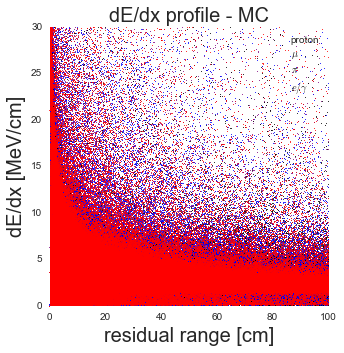

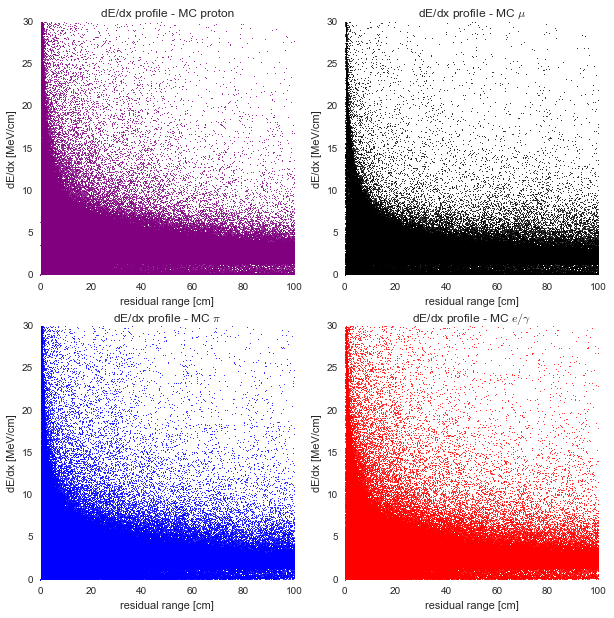

In [88]:
Nmax = 600000
fig, ax = plt.subplots(figsize=[5,5])
fig2 = plt.figure(figsize=[10,10])
ax.patch.set_facecolor('#FFFFFF')
ax.set_title("dE/dx profile - MC",fontsize=20)
ax.set_xlabel("residual range [cm]",fontsize=20)
ax.set_ylabel("dE/dx [MeV/cm]",fontsize=20)
# ax.grid(True,linestyle='-',color='0.75')

colors = ['purple' , 'black', 'blue', 'red' ]
axes = []
i_plots = [0,1,2,3]
labels = ['proton' , '$\\mu$', '$\\pi$' , '$e/\\gamma$' ]
for i , x , y , color , label in zip(i_plots,
                                     [length_p[0:Nmax],length_mu[0:Nmax],length_pi[0:Nmax],length_em[0:Nmax]],
                                     [dEdx_p[0:Nmax],dEdx_mu[0:Nmax],dEdx_pi[0:Nmax],dEdx_em[0:Nmax]],
                                     colors,
                                     labels):
    ax.plot( x, y , 'o', markersize=1, label=label , color=color)
    axes.append( fig2.add_subplot(2,2,i+1) )
    axes[i].plot( x, y , 'o', markersize=1, label=label, color=color)
    axes[i].patch.set_facecolor('#FFFFFF')
    axes[i].set_title("dE/dx profile - MC %s"%label)
    axes[i].set_xlabel("residual range [cm]")
    axes[i].set_ylabel("dE/dx [MeV/cm]")
    axes[i].set_xlim([0, 100])
    axes[i].set_ylim([0, 30])
    
ax.legend( loc='upper right' )
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='upper right',
#            ncol=2, mode="expand", borderaxespad=0.,fontsize=20)
ax.set_xlim([0, 100])
ax.set_ylim([0, 30])

In [106]:
df_p = pd.DataFrame(data={'residual-range':length_p,'dE/dx':dEdx_p})
df_mu = pd.DataFrame(data={'residual-range':length_mu,'dE/dx':dEdx_mu})
df_pi = pd.DataFrame(data={'residual-range':length_pi,'dE/dx':dEdx_pi})
df_em = pd.DataFrame(data={'residual-range':length_em,'dE/dx':dEdx_em})

In [111]:
df_all = pd.concat([df_p,df_mu,df_pi,df_em], keys=['MC-protons', 'MC-muons', 'MC-pions','MC-em'])

In [ ]:
df_all.to_csv( anafiles_path + '/' + DataName + '_hits_dEdx_profile.csv')